# Config

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import ylabel, annotate
import statsmodels.formula.api as smf

In [2]:
sns.set_theme(style="whitegrid")
sns.set_context("paper")

# Data

## Prepare

### Yelp

In [12]:
yelp_merged = pd.read_csv("../data/yelp_analysis_2.csv")

In [13]:
yelp_unclassified = yelp_merged.query("prediction == -1")

In [14]:
idx = [474069,482472,502960,999289]
yelp_merged.loc[idx, 'prediction'] = 1

In [15]:
idx = [11386,11700,13061,15034,16008,16439,20813,21250,25349,151517,328787,488882,514229,520500,1300558]
yelp_merged.loc[idx, 'prediction'] = 0

In [16]:
yelp_merged_edited = yelp_merged.drop(columns=['review_text'])

In [17]:
yelp_merged_edited.to_csv("../data/yelp_analysis_2.csv", index=False)

### IMDb

In [3]:
imdb_merged = pd.read_csv("../data/imdb_all_not_pred.csv")

In [4]:
imdb_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634415 entries, 0 to 1634414
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   index_prev     1634415 non-null  int64  
 1   date           1634415 non-null  object 
 2   user           1634415 non-null  object 
 3   item           1634415 non-null  object 
 4   review_rating  1634415 non-null  float64
 5   review_length  1634415 non-null  int64  
 6   bandwagon      1634415 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 87.3+ MB


In [112]:
imdb_merged_unclassified = imdb_merged.query("prediction == -1")

In [114]:
imdb_merged.drop(imdb_merged_unclassified.index, inplace=True)

In [115]:
imdb_merged.dropna(inplace=True)

In [116]:
imdb_merged.drop(columns=['review_text'], inplace=True)

In [118]:
imdb_merged.to_csv("../data/imdb_analysis.csv", index=False)

## Load data for analysis

In [51]:
yelp_all = pd.read_csv("../data/yelp_analysis_2.csv")

In [26]:
imdb_all = pd.read_csv("../data/imdb_all_not_pred.csv")
imdb_sample = pd.read_csv("../data/imdb_merged.csv")
imdb_all['prediction'] = imdb_sample['prediction']

In [27]:
imdb_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634415 entries, 0 to 1634414
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   index_prev     1634415 non-null  int64  
 1   date           1634415 non-null  object 
 2   user           1634415 non-null  object 
 3   item           1634415 non-null  object 
 4   review_rating  1634415 non-null  float64
 5   review_length  1634415 non-null  int64  
 6   bandwagon      1634415 non-null  int64  
 7   prediction     200000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.8+ MB


# Analysis

In [52]:
yelp_all['date'] = pd.to_datetime(yelp_all['date'])
yelp_all.sort_values('date', inplace=True)
# yelp_all = yelp_all.query("prediction != -1")

In [6]:
yelp_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1402801 entries, 0 to 602800
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   date           1402801 non-null  datetime64[ns]
 1   user           1402801 non-null  object        
 2   item           1402801 non-null  object        
 3   review_rating  1402801 non-null  float64       
 4   review_length  1402801 non-null  int64         
 5   bandwagon      1402801 non-null  int64         
 6   prediction     1402801 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 85.6+ MB


In [29]:
imdb_all['date'] = pd.to_datetime(imdb_all['date'])
imdb_all.sort_values('date', inplace=True)
imdb_all['review_rating'] = imdb_all['review_rating']/2

In [30]:
imdb_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1634415 entries, 710846 to 639718
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   index_prev     1634415 non-null  int64         
 1   date           1634415 non-null  datetime64[ns]
 2   user           1634415 non-null  object        
 3   item           1634415 non-null  object        
 4   review_rating  1634415 non-null  float64       
 5   review_length  1634415 non-null  int64         
 6   bandwagon      1634415 non-null  int64         
 7   prediction     200000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 112.2+ MB


## New Features and Datasets

### Review level

#### Yelp

In [53]:
yelp_review = yelp_all.copy()

# new columns
yelp_review['order'] = yelp_review.groupby('item')['date'].rank(method='min').astype(int)
#tmp = yelp_review.sort_values(['item', 'date']).copy()
yelp_review['avg_rating_prev'] = yelp_review.sort_values(['item', 'date']).groupby('item')['review_rating'].expanding().mean().groupby(level=0).shift(1).reset_index(level=0, drop=True).round(2)
yelp_review['delta_to_avg_rating_prev'] = yelp_review['review_rating'] - yelp_review['avg_rating_prev'].round(2)

In [123]:
yelp_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1402801 entries, 0 to 602800
Data columns (total 10 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   date                      1402801 non-null  datetime64[ns]
 1   user                      1402801 non-null  object        
 2   item                      1402801 non-null  object        
 3   review_rating             1402801 non-null  float64       
 4   review_length             1402801 non-null  int64         
 5   bandwagon                 1402801 non-null  int64         
 6   prediction                1402801 non-null  int64         
 7   order                     1402801 non-null  int64         
 8   avg_rating_prev           1399256 non-null  float64       
 9   delta_to_avg_rating_prev  1399256 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 117.7+ MB


In [55]:
yelp_review.describe()

,date,review_rating,review_length,bandwagon,prediction,order,avg_rating_prev,delta_to_avg_rating_prev
count,1402801,1.402801e+06,1.402801e+06,1.402801e+06,1.402801e+06,1.402801e+06,1.399256e+06,1.399256e+06
mean,2015-06-04 08:57:08.938530304,3.779179e+00,1.064911e+02,7.969626e-02,9.210857e-02,4.820512e+02,3.797712e+00,-1.915571e-02
min,2004-10-20 00:00:00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-4.000000e+00
25%,2013-05-05 00:00:00,3.000000e+00,4.200000e+01,0.000000e+00,0.000000e+00,1.040000e+02,3.560000e+00,-7.400000e-01
50%,2015-08-15 00:00:00,4.000000e+00,7.700000e+01,0.000000e+00,0.000000e+00,2.510000e+02,3.870000e+00,1.900000e-01
75%,2017-11-05 00:00:00,5.000000e+00,1.380000e+02,0.000000e+00,0.000000e+00,5.630000e+02,4.080000e+00,9.200000e-01
max,2021-07-09 00:00:00,5.000000e+00,1.015000e+03,1.000000e+00,1.000000e+00,1.018300e+04,5.000000e+00,4.000000e+00
std,NaN,1.275335e+00,9.828538e+01,2.708225e-01,2.891793e-01,7.493126e+02,4.397287e-01,1.216827e+00


#### IMDb

In [31]:
imdb_review = imdb_all.copy()

# new columns
imdb_review['order'] = imdb_review.groupby('item')['date'].rank(method='min').astype(int)
imdb_review['avg_rating_prev'] = imdb_review.sort_values(['item', 'date']).groupby('item')['review_rating'].expanding().mean().groupby(level=0).shift(1).reset_index(level=0, drop=True).round(2)
imdb_review['delta_to_avg_rating_prev'] = imdb_review['review_rating'] - imdb_review['avg_rating_prev'].round(2)

In [32]:
imdb_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1634415 entries, 710846 to 639718
Data columns (total 11 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   index_prev                1634415 non-null  int64         
 1   date                      1634415 non-null  datetime64[ns]
 2   user                      1634415 non-null  object        
 3   item                      1634415 non-null  object        
 4   review_rating             1634415 non-null  float64       
 5   review_length             1634415 non-null  int64         
 6   bandwagon                 1634415 non-null  int64         
 7   prediction                200000 non-null   float64       
 8   order                     1634415 non-null  int64         
 9   avg_rating_prev           1627353 non-null  float64       
 10  delta_to_avg_rating_prev  1627353 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(

### Item level

#### Yelp

In [54]:
yelp_item = yelp_all[['item', 'bandwagon']].drop_duplicates()
yelp_item = yelp_item.set_index('item')

yelp_item['avg_rating'] = yelp_all.groupby('item')['review_rating'].mean().round(2)
yelp_item['std_rating'] = yelp_all.groupby('item')['review_rating'].std().fillna(0).round(2)
yelp_item['avg_text_length'] = yelp_all.groupby('item')['review_length'].mean().round(2)
yelp_item['std_text_length'] = yelp_all.groupby('item')['review_length'].std().fillna(0).round(2)
yelp_item['amount_of_reviews'] = yelp_all.groupby('item')['review_rating'].count()
yelp_item['amount_of_reviews_with_reference'] = yelp_all.groupby('item')['prediction'].sum()
yelp_item['percent_amount_of_reviews_with_reference'] = (yelp_item['amount_of_reviews_with_reference'] / yelp_item['amount_of_reviews'] *100).round(2)
yelp_item['date_first_review'] = yelp_all.groupby('item')['date'].min()
yelp_item['item_age'] = (yelp_all['date'].max() - yelp_item['date_first_review']).dt.days
yelp_item['avg_delta_rating'] = yelp_review.groupby('item')['delta_to_avg_rating_prev'].mean().round(2)


In [149]:
yelp_item.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3545 entries, joes-shanghai-new-york-2 to taiyaki-nyc-new-york
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   bandwagon                                 3545 non-null   int64         
 1   avg_rating                                3545 non-null   float64       
 2   std_rating                                3545 non-null   float64       
 3   avg_text_length                           3545 non-null   float64       
 4   std_text_length                           3545 non-null   float64       
 5   amount_of_reviews                         3545 non-null   int64         
 6   amount_of_reviews_with_reference          3545 non-null   int64         
 7   percent_amount_of_reviews_with_reference  3545 non-null   float64       
 8   date_first_review                         3545 non-null   datetime64[ns]
 

#### IMDb

In [42]:
imdb_item = imdb_all[['item', 'bandwagon']].drop_duplicates()
imdb_item = imdb_item.set_index('item')

imdb_item['avg_rating'] = imdb_all.groupby('item')['review_rating'].mean().round(2)
imdb_item['std_rating'] = imdb_all.groupby('item')['review_rating'].std().fillna(0).round(2)
imdb_item['avg_text_length'] = imdb_all.groupby('item')['review_length'].mean().round(2)
imdb_item['std_text_length'] = imdb_all.groupby('item')['review_length'].std().fillna(0).round(2)
imdb_item['amount_of_reviews'] = imdb_all.groupby('item')['review_rating'].count()
imdb_item['amount_of_reviews_sample'] = imdb_all.groupby('item')['prediction'].count()
imdb_item['amount_of_reviews_with_reference'] = imdb_all.groupby('item')['prediction'].sum()
imdb_item['percent_amount_of_reviews_with_reference'] = (imdb_item['amount_of_reviews_with_reference'] / imdb_item['amount_of_reviews_sample']*100).round(2)
imdb_item['date_first_review'] = imdb_all.groupby('item')['date'].min()
imdb_item['item_age'] = (imdb_all['date'].max() - imdb_item['date_first_review']).dt.days
imdb_item['avg_delta_rating'] = imdb_review.groupby('item')['delta_to_avg_rating_prev'].mean().round(2)


In [34]:
imdb_item.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7062 entries, Gummo (1997) to El Camino: A Breaking Bad Movie (2019)
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   bandwagon                                 7062 non-null   int64         
 1   avg_rating                                7062 non-null   float64       
 2   std_rating                                7062 non-null   float64       
 3   avg_text_length                           7062 non-null   float64       
 4   std_text_length                           7062 non-null   float64       
 5   amount_of_reviews                         7062 non-null   int64         
 6   amount_of_reviews_with_reference          7062 non-null   float64       
 7   percent_amount_of_reviews_with_reference  7062 non-null   float64       
 8   date_first_review                         7062 non-null   datetime64

### User level

#### Yelp

In [55]:
yelp_user = yelp_all[['user']].drop_duplicates()
yelp_user = yelp_user.set_index('user')

yelp_user['avg_rating'] = yelp_all.groupby('user')['review_rating'].mean().round(2)
yelp_user['std_rating'] = yelp_all.groupby('user')['review_rating'].std().round(2).fillna(0)
yelp_user['avg_text_length'] = yelp_all.groupby('user')['review_length'].mean().round(2)
yelp_user['std_text_length'] = yelp_all.groupby('user')['review_length'].std().round(2).fillna(0)
yelp_user['amount_of_reviews'] = yelp_all.groupby('user')['review_rating'].count()
yelp_user['amount_of_reviews_with_reference'] = yelp_all.groupby('user')['prediction'].sum()
yelp_user['percent_amount_of_reviews_with_reference'] = (yelp_user['amount_of_reviews_with_reference'] / yelp_user['amount_of_reviews']*100).round(2)
yelp_user['date_first_review'] = yelp_all.groupby('user')['date'].min()
yelp_user['user_age'] = (yelp_all['date'].max() - yelp_user['date_first_review']).dt.days
yelp_user['percent_amount_of_reviews_on_bandwagon_items'] = (yelp_all.groupby('user')['bandwagon'].mean() *100).round(2)

In [145]:
yelp_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541016 entries, APJAMnqQTFmK3EGQdY4Iig to bhlTbKJXui4-dDy_MCctzw
Data columns (total 10 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   avg_rating                                    541016 non-null  float64       
 1   std_rating                                    541016 non-null  float64       
 2   avg_text_length                               541016 non-null  float64       
 3   std_text_length                               541016 non-null  float64       
 4   amount_of_reviews                             541016 non-null  int64         
 5   amount_of_reviews_with_reference              541016 non-null  int64         
 6   percent_amount_of_reviews_with_reference      541016 non-null  float64       
 7   date_first_review                             541016 non-null  datetime64[ns]
 8   user_age              

#### IMDb

In [35]:
imdb_user = imdb_all[['user']].drop_duplicates()
imdb_user = imdb_user.set_index('user')

imdb_user['avg_rating'] = imdb_all.groupby('user')['review_rating'].mean().round(2)
imdb_user['std_rating'] = imdb_all.groupby('user')['review_rating'].std().fillna(0).round(2)
imdb_user['avg_text_length'] = imdb_all.groupby('user')['review_length'].mean().round(2)
imdb_user['std_text_length'] = imdb_all.groupby('user')['review_length'].std().fillna(0).round(2)
imdb_user['amount_of_reviews'] = imdb_all.groupby('user')['review_rating'].count()
imdb_user['amount_of_reviews_with_reference'] = imdb_all.groupby('user')['prediction'].sum()
imdb_user['percent_amount_of_reviews_with_reference'] = (imdb_user['amount_of_reviews_with_reference'] / imdb_user['amount_of_reviews']*100).round(2)
imdb_user['date_first_review'] = imdb_all.groupby('user')['date'].min()
imdb_user['user_age'] = (imdb_all['date'].max() - imdb_user['date_first_review']).dt.days
imdb_user['percent_amount_of_reviews_on_bandwagon_items'] = (imdb_all.groupby('user')['bandwagon'].mean()*100).round(2)

In [36]:
imdb_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 589364 entries, jreeves to freddieyoung-90957
Data columns (total 10 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   avg_rating                                    589364 non-null  float64       
 1   std_rating                                    589364 non-null  float64       
 2   avg_text_length                               589364 non-null  float64       
 3   std_text_length                               589364 non-null  float64       
 4   amount_of_reviews                             589364 non-null  int64         
 5   amount_of_reviews_with_reference              589364 non-null  float64       
 6   percent_amount_of_reviews_with_reference      589364 non-null  float64       
 7   date_first_review                             589364 non-null  datetime64[ns]
 8   user_age                                 

## Deskriptive Statistics

### Review level

#### Yelp

In [65]:
yelp_review_with_reference = yelp_review.query("prediction == 1")
yelp_review_without_reference = yelp_review.query("prediction == 0")
yelp_review_results = pd.DataFrame({'type':['all_reviews', 'reviews_with_reference', 'reviews_without_reference']})

yelp_review_results['count'] = [yelp_review.shape[0], yelp_review_with_reference.shape[0], yelp_review_without_reference.shape[0]]
yelp_review_results['avg_rating'] = [yelp_review['review_rating'].mean().round(2), yelp_review_with_reference['review_rating'].mean().round(2), yelp_review_without_reference['review_rating'].mean().round(2)]
yelp_review_results['std_rating'] = [yelp_review['review_rating'].std().round(2), yelp_review_with_reference['review_rating'].std().round(2), yelp_review_without_reference['review_rating'].std().round(2)]
yelp_review_results['avg_text_length'] = [yelp_review['review_length'].mean().round(2), yelp_review_with_reference['review_length'].mean().round(2), yelp_review_without_reference['review_length'].mean().round(2)]
yelp_review_results['std_text_length'] = [yelp_review['review_length'].std().round(2), yelp_review_with_reference['review_length'].std().round(2), yelp_review_without_reference['review_length'].std().round(2)]
yelp_review_results['avg_delta_to_avg_rating_prev'] = [yelp_review['delta_to_avg_rating_prev'].mean().round(2), yelp_review_with_reference['delta_to_avg_rating_prev'].mean().round(2), yelp_review_without_reference['delta_to_avg_rating_prev'].mean().round(2)]
yelp_review_results['avg_order'] = [yelp_review['order'].mean().round(2), yelp_review_with_reference['order'].mean().round(2), yelp_review_without_reference['order'].mean().round(2)]
yelp_review_results['median_order'] = [yelp_review['order'].median(), yelp_review_with_reference['order'].median(), yelp_review_without_reference['order'].median()]
yelp_review_results['std_order'] = [yelp_review['order'].std().round(2), yelp_review_with_reference['order'].std().round(2), yelp_review_without_reference['order'].std().round(2)]

yelp_review_results

,type,count,avg_rating,std_rating,avg_text_length,std_text_length,avg_delta_to_avg_rating_prev,avg_order,median_order,std_order
0,all_reviews,1402801,3.78,1.28,106.49,98.29,-0.02,482.05,251.0,749.31
1,reviews_with_reference,129210,3.37,1.34,178.18,133.60,-0.45,542.15,249.0,895.12
2,reviews_without_reference,1273591,3.82,1.26,99.22,90.86,0.02,475.95,251.0,732.63


<Axes: >

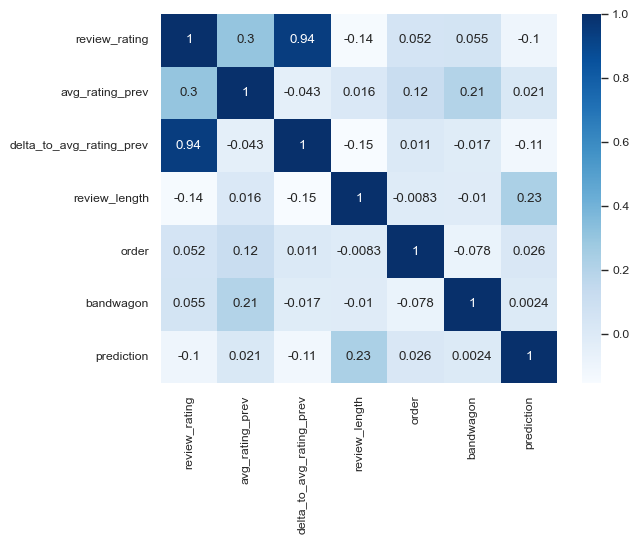

In [16]:
sns.heatmap(yelp_review[['review_rating', 'avg_rating_prev', 'delta_to_avg_rating_prev', 'review_length', 'order', 'bandwagon', 'prediction']].corr(), annot=True, cmap='Blues')

<Axes: xlabel='date', ylabel='Count'>

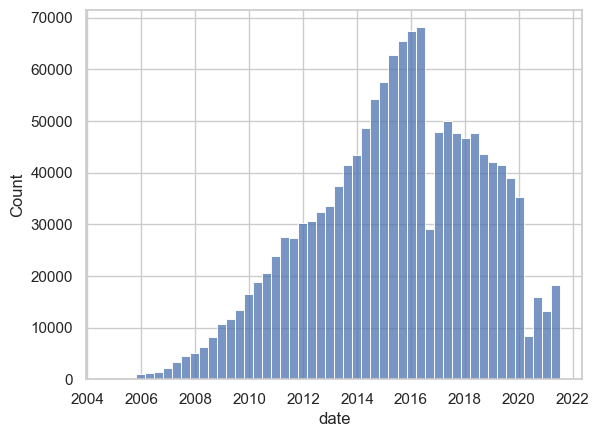

In [22]:
sns.histplot(yelp_review, x='date', bins=50)

#### IMDb

In [37]:
imdb_review_with_reference = imdb_review.query("prediction == 1")
imdb_review_without_reference = imdb_review.query("prediction == 0")
imdb_review_results = pd.DataFrame({'type':['all_reviews', 'reviews_with_reference', 'reviews_without_reference']})

imdb_review_results['count'] = [imdb_review.shape[0], imdb_review_with_reference.shape[0], imdb_review_without_reference.shape[0]]
imdb_review_results['avg_rating'] = [imdb_review['review_rating'].mean().round(2), imdb_review_with_reference['review_rating'].mean().round(2), imdb_review_without_reference['review_rating'].mean().round(2)]
imdb_review_results['std_rating'] = [imdb_review['review_rating'].std().round(2), imdb_review_with_reference['review_rating'].std().round(2), imdb_review_without_reference['review_rating'].std().round(2)]
imdb_review_results['avg_text_length'] = [imdb_review['review_length'].mean().round(2), imdb_review_with_reference['review_length'].mean().round(2), imdb_review_without_reference['review_length'].mean().round(2)]
imdb_review_results['std_text_length'] = [imdb_review['review_length'].std().round(2), imdb_review_with_reference['review_length'].std().round(2), imdb_review_without_reference['review_length'].std().round(2)]
imdb_review_results['avg_delta_to_avg_rating_prev'] = [imdb_review['delta_to_avg_rating_prev'].mean().round(2), imdb_review_with_reference['delta_to_avg_rating_prev'].mean().round(2), imdb_review_without_reference['delta_to_avg_rating_prev'].mean().round(2)]
imdb_review_results['avg_order'] = [imdb_review['order'].mean().round(2), imdb_review_with_reference['order'].mean().round(2), imdb_review_without_reference['order'].mean().round(2)]
imdb_review_results['median_order'] = [imdb_review['order'].median(), imdb_review_with_reference['order'].median(), imdb_review_without_reference['order'].median()]
imdb_review_results['std_order'] = [imdb_review['order'].std().round(2), imdb_review_with_reference['order'].std().round(2), imdb_review_without_reference['order'].std().round(2)]

imdb_review_results

,type,count,avg_rating,std_rating,avg_text_length,std_text_length,avg_delta_to_avg_rating_prev,avg_order,median_order,std_order
0,all_reviews,1634415,3.38,1.44,229.74,193.70,-0.09,366.91,155.0,594.00
1,reviews_with_reference,23107,3.24,1.56,271.00,202.16,-0.11,402.31,181.0,600.96
2,reviews_without_reference,176749,3.39,1.42,223.40,188.80,-0.09,362.72,152.0,593.26


<Axes: >

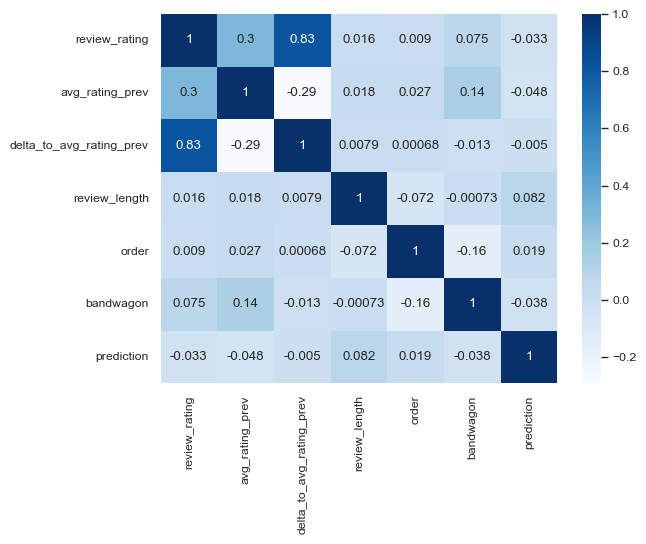

In [141]:
sns.heatmap(imdb_review[['review_rating', 'avg_rating_prev', 'delta_to_avg_rating_prev', 'review_length', 'order', 'bandwagon', 'prediction']].corr(), annot=True, cmap='Blues')

<Axes: xlabel='date', ylabel='Count'>

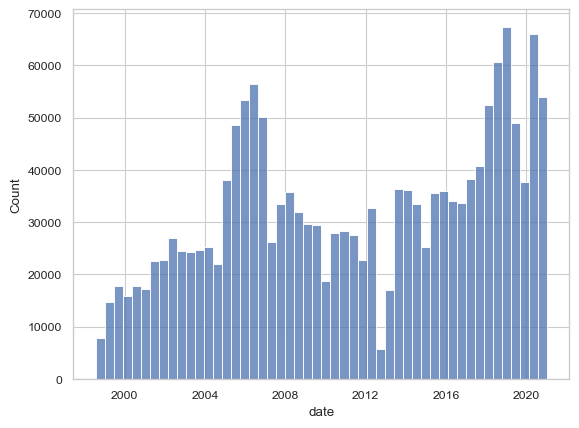

In [38]:
sns.histplot(imdb_review, x='date', bins=50)

### Item level

#### Yelp

In [61]:
yelp_item_is_bandwagon = yelp_item.query("bandwagon==1")
yelp_item_is_not_bandwagon = yelp_item.query("bandwagon==0")
yelp_item_results = pd.DataFrame({'type':['all_items', 'items_bandwagon', 'items_not_bandwagon']})

yelp_item_results['count'] = [yelp_item.shape[0], yelp_item_is_bandwagon.shape[0], yelp_item_is_not_bandwagon.shape[0]]
yelp_item_results['avg_rating'] = [yelp_item['avg_rating'].mean(), yelp_item_is_bandwagon['avg_rating'].mean(), yelp_item_is_not_bandwagon['avg_rating'].mean()]
yelp_item_results['std_rating'] = [yelp_item['std_rating'].mean(), yelp_item_is_bandwagon['std_rating'].mean(), yelp_item_is_not_bandwagon['std_rating'].mean()]
yelp_item_results['avg_text_length'] = [yelp_item['avg_text_length'].mean(), yelp_item_is_bandwagon['avg_text_length'].mean(), yelp_item_is_not_bandwagon['avg_text_length'].mean()]
yelp_item_results['std_text_length'] = [yelp_item['std_text_length'].mean(), yelp_item_is_bandwagon['std_text_length'].mean(), yelp_item_is_not_bandwagon['std_text_length'].mean()]
yelp_item_results['avg_amount_of_reviews'] = [yelp_item['amount_of_reviews'].mean(), yelp_item_is_bandwagon['amount_of_reviews'].mean(), yelp_item_is_not_bandwagon['amount_of_reviews'].mean()]
yelp_item_results['avg_percent_amount_of_reviews_with_reference'] = [yelp_item['percent_amount_of_reviews_with_reference'].mean(), yelp_item_is_bandwagon['percent_amount_of_reviews_with_reference'].mean(), yelp_item_is_not_bandwagon['percent_amount_of_reviews_with_reference'].mean()]
yelp_item_results['avg_delta_rating'] = [yelp_item['avg_delta_rating'].mean(), yelp_item_is_bandwagon['avg_delta_rating'].mean(), yelp_item_is_not_bandwagon['avg_delta_rating'].mean()]

yelp_item_results

,type,count,avg_rating,std_rating,avg_text_length,std_text_length,avg_amount_of_reviews,avg_percent_amount_of_reviews_with_reference,avg_delta_rating
0,all_items,3545,3.668274,1.264102,98.525817,86.715842,395.712553,8.057346,-0.042883
1,items_bandwagon,373,4.017748,1.124799,96.866756,85.113458,299.726542,8.416944,-0.103378
2,items_not_bandwagon,3172,3.627178,1.280482,98.720908,86.904269,406.999685,8.015060,-0.035769


<Axes: >

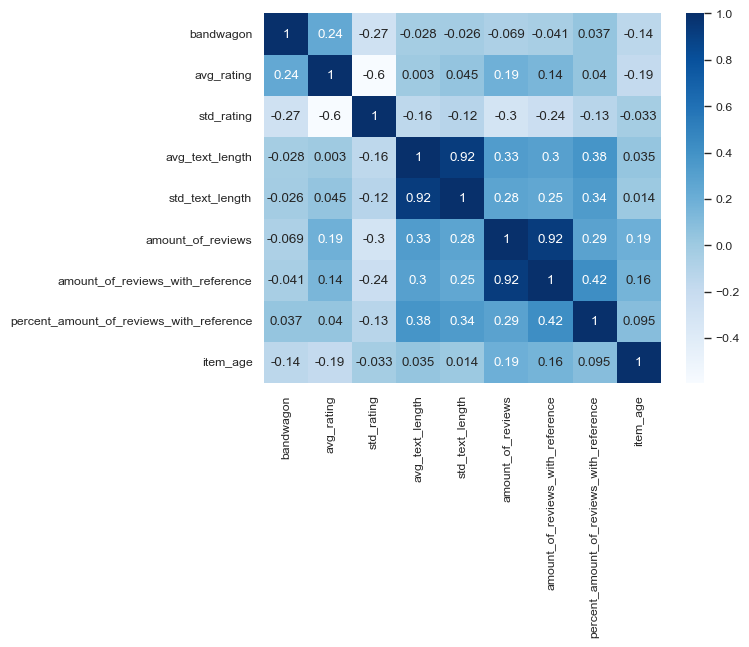

In [146]:
sns.heatmap(yelp_item[['bandwagon', 'avg_rating', 'std_rating', 'avg_text_length', 'std_text_length', 'amount_of_reviews', 'amount_of_reviews_with_reference', 'percent_amount_of_reviews_with_reference', 'item_age']].corr(), annot=True, cmap='Blues')

<Axes: xlabel='amount_of_reviews', ylabel='Count'>

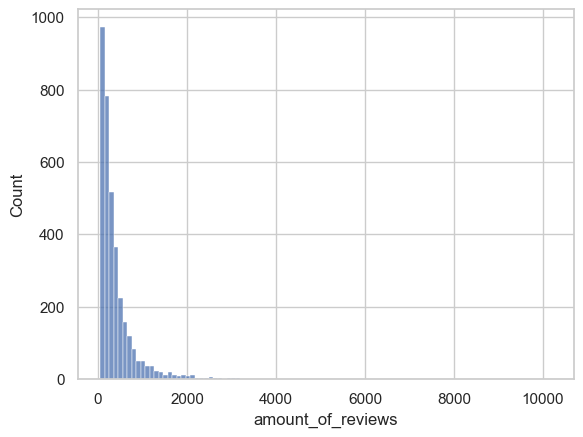

In [42]:
sns.histplot(yelp_item, x='amount_of_reviews', bins=100)

#### IMDb

In [60]:
imdb_item_is_bandwagon = imdb_item.query("bandwagon==1")
imdb_item_is_not_bandwagon = imdb_item.query("bandwagon==0")
imdb_item_results = pd.DataFrame({'type':['all_items', 'items_bandwagon', 'items_not_bandwagon']})

imdb_item_results['count'] = [imdb_item.shape[0], imdb_item_is_bandwagon.shape[0], imdb_item_is_not_bandwagon.shape[0]]
imdb_item_results['avg_rating'] = [imdb_item['avg_rating'].mean().round(2), imdb_item_is_bandwagon['avg_rating'].mean().round(2), imdb_item_is_not_bandwagon['avg_rating'].mean().round(2)]
imdb_item_results['std_rating'] = [imdb_item['std_rating'].mean().round(2), imdb_item_is_bandwagon['std_rating'].mean().round(2), imdb_item_is_not_bandwagon['std_rating'].mean().round(2)]
imdb_item_results['avg_text_length'] = [imdb_item['avg_text_length'].mean().round(2), imdb_item_is_bandwagon['avg_text_length'].mean().round(2), imdb_item_is_not_bandwagon['avg_text_length'].mean().round(2)]
imdb_item_results['std_text_length'] = [imdb_item['std_text_length'].mean().round(2), imdb_item_is_bandwagon['std_text_length'].mean().round(2), imdb_item_is_not_bandwagon['std_text_length'].mean().round(2)]
imdb_item_results['avg_amount_of_reviews'] = [imdb_item['amount_of_reviews'].mean().round(2), imdb_item_is_bandwagon['amount_of_reviews'].mean().round(2), imdb_item_is_not_bandwagon['amount_of_reviews'].mean().round(2)]
imdb_item_results['avg_percent_amount_of_reviews_with_reference'] = [imdb_item['percent_amount_of_reviews_with_reference'].mean().round(2), imdb_item_is_bandwagon['percent_amount_of_reviews_with_reference'].mean().round(2), imdb_item_is_not_bandwagon['percent_amount_of_reviews_with_reference'].mean().round(2)]
imdb_item_results['avg_delta_rating'] = [imdb_item['avg_delta_rating'].mean().round(2), imdb_item_is_bandwagon['avg_delta_rating'].mean().round(2), imdb_item_is_not_bandwagon['avg_delta_rating'].mean().round(2)]

imdb_item_results

,type,count,avg_rating,std_rating,avg_text_length,std_text_length,avg_amount_of_reviews,avg_percent_amount_of_reviews_with_reference,avg_delta_rating
0,all_items,7062,3.40,1.22,232.50,180.43,231.44,9.89,-0.09
1,items_bandwagon,1788,3.64,1.09,233.49,179.34,117.92,7.94,-0.13
2,items_not_bandwagon,5274,3.32,1.26,232.17,180.80,269.92,10.55,-0.08


<Axes: >

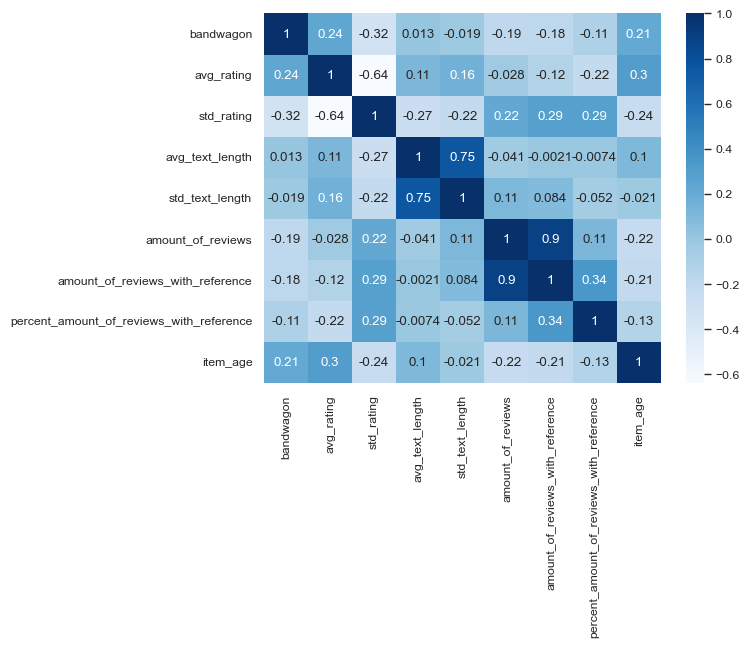

In [40]:
sns.heatmap(imdb_item[['bandwagon', 'avg_rating', 'std_rating', 'avg_text_length', 'std_text_length', 'amount_of_reviews', 'amount_of_reviews_with_reference', 'percent_amount_of_reviews_with_reference', 'item_age']].corr(), annot=True, cmap='Blues')

<Axes: xlabel='amount_of_reviews', ylabel='Count'>

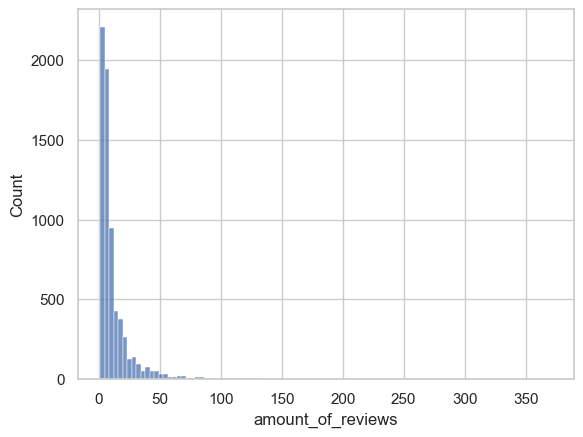

In [45]:
sns.histplot(imdb_item, x='amount_of_reviews', bins=100)

### User level

#### Yelp

In [151]:
# user groups when created
def apply_groups(row):
    if row['amount_of_reviews'] <= 1:
        return '1'
    if row['amount_of_reviews'] <= 10:
        return '2-10'
    if row['amount_of_reviews'] <= 50:
        return '11-50'
    return '50+'

yelp_user['group'] = yelp_user.apply(apply_groups, axis=1)

<Axes: >

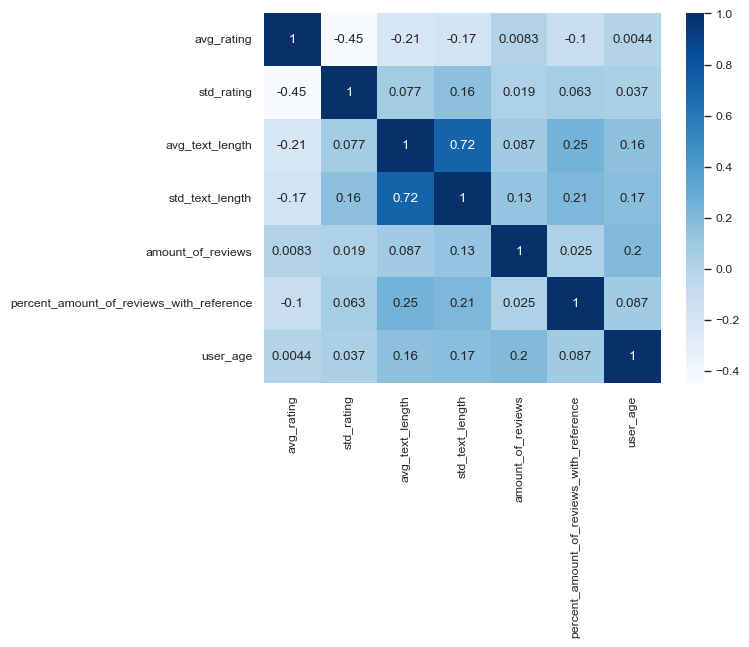

In [152]:
sns.heatmap(yelp_user[['avg_rating', 'std_rating', 'avg_text_length', 'std_text_length', 'amount_of_reviews', 'percent_amount_of_reviews_with_reference', 'user_age']].corr(), annot=True, cmap='Blues')

<Axes: xlabel='amount_of_reviews', ylabel='Count'>

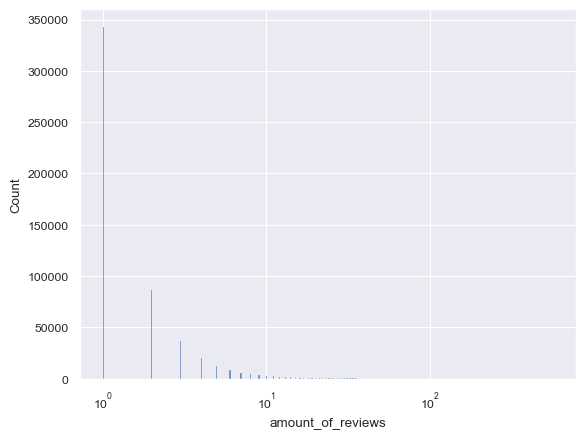

In [153]:
sns.histplot(yelp_user, x='amount_of_reviews', log_scale=True)

[Text(0, 0, '179832'),
 Text(0, 0, '343069'),
 Text(0, 0, '16629'),
 Text(0, 0, '1486')]

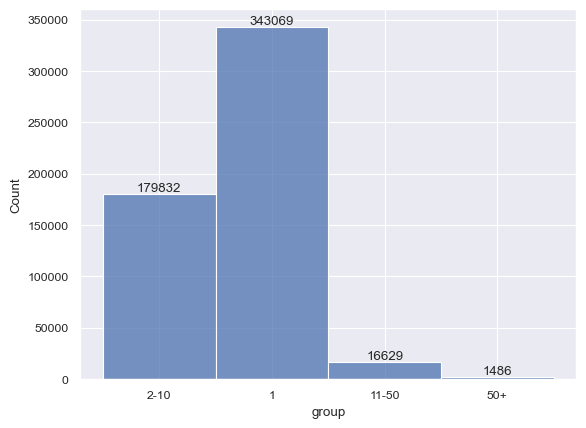

In [154]:
ax = sns.histplot(yelp_user, x='group', stat='count')
ax.bar_label(ax.containers[0])

#### IMDb

<Axes: >

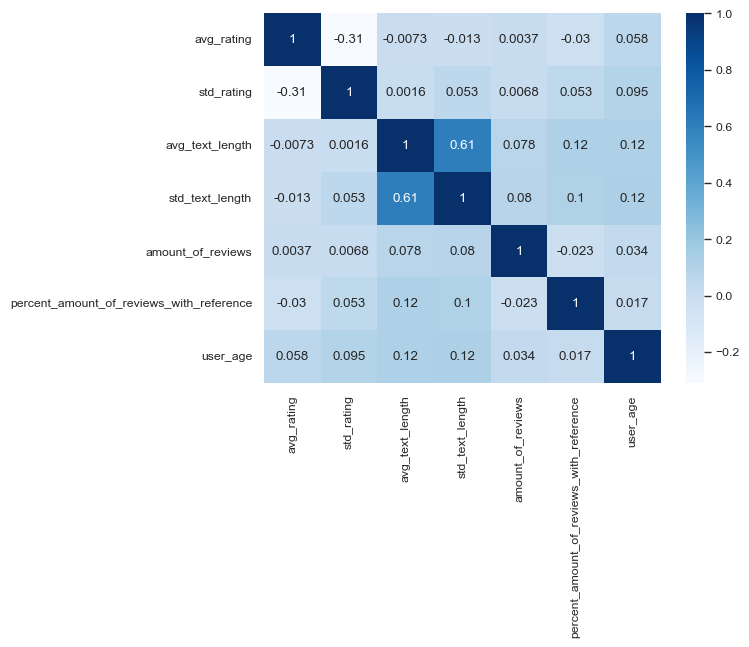

In [155]:
sns.heatmap(imdb_user[['avg_rating', 'std_rating', 'avg_text_length', 'std_text_length', 'amount_of_reviews', 'percent_amount_of_reviews_with_reference', 'user_age']].corr(), annot=True, cmap='Blues')

<Axes: xlabel='amount_of_reviews', ylabel='Count'>

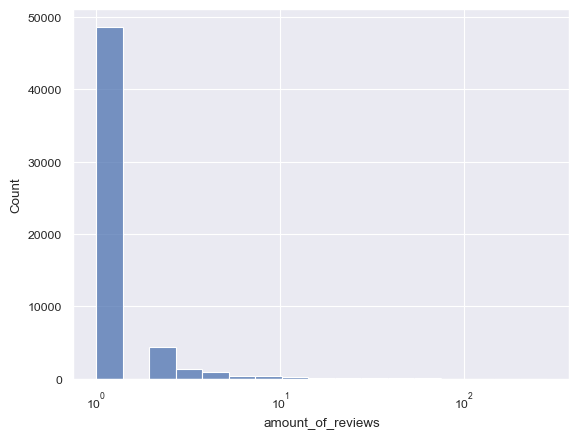

In [156]:
sns.histplot(imdb_user, x='amount_of_reviews', log_scale=True)

## Regression Analysis

In [44]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = StandardScaler()

#### Review

In [56]:
reg_review_data = yelp_review.copy()
#reg_review_data = imdb_review.copy()
reg_review_data['avg_rating_user'] = reg_review_data.groupby('user')['review_rating'].transform('mean')
# reg_review_data['avg_rating_item'] = reg_review_data.groupby('item')['review_rating'].transform('mean')
reg_review_data['amount_reviews_user'] = reg_review_data.groupby('user')['review_rating'].transform('count')

# scaling
reg_review_data[['review_length', 'order', 'amount_reviews_user', 'avg_rating_prev', 'avg_rating_user','review_rating']] = scaler.fit_transform(reg_review_data[['review_length', 'order', 'amount_reviews_user', 'avg_rating_prev', 'avg_rating_user', 'review_rating']])

In [57]:
formula = (
    'delta_to_avg_rating_prev ~ '
    'prediction +'
    # 'review_rating +' # doesnt work
    'bandwagon +'
    'review_length +'
    'avg_rating_prev +'
    'order +'
    'avg_rating_user +'
    'amount_reviews_user +'
    # 'avg_rating_item' # correlates with avg_rating_prev
    'prediction * bandwagon +'
    'prediction * order'
    # 'bandwagon * order'
    # 'avg_rating_prev * order'
    # 'bandwagon * avg_rating_prev'
)

model = smf.ols(formula, data=reg_review_data)
results = model.fit()
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     delta_to_avg_rating_prev   R-squared:                       0.557
Model:                                  OLS   Adj. R-squared:                  0.557
Method:                       Least Squares   F-statistic:                 1.952e+05
Date:                      Fri, 16 May 2025   Prob (F-statistic):               0.00
Time:                              17:00:31   Log-Likelihood:            -1.6910e+06
No. Observations:                   1399256   AIC:                         3.382e+06
Df Residuals:                       1399246   BIC:                         3.382e+06
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Create the interaction term columns
reg_review_data['prediction_X_bandwagon'] = reg_review_data['prediction'] * reg_review_data['bandwagon']
reg_review_data['prediction_X_order'] = reg_review_data['prediction'] * reg_review_data['order']

independent_vars = [
    'prediction',
    'bandwagon',
    'review_length',
    'avg_rating_prev',
    'order',
    'avg_rating_user',
    'amount_reviews_user',
    'prediction_X_bandwagon',
    'prediction_X_order',
]

X = reg_review_data[independent_vars]
X = X.dropna()

X_with_const = sm.add_constant(X)


vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns

vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print(vif_data)

#print(X[['avg_rating_prev', 'avg_rating_item']].corr())

                  feature       VIF
0                   const  1.310733
1              prediction  1.129138
2               bandwagon  1.166346
3           review_length  1.025763
4         avg_rating_prev  1.123823
5                   order  1.166869
6         avg_rating_user  1.082983
7     amount_reviews_user  1.032849
8  prediction_X_bandwagon  1.212342
9      prediction_X_order  1.155712


### Item

In [65]:
reg_item_data = yelp_item.copy()

reg_item_data[['amount_of_reviews', 'percent_amount_of_reviews_with_reference', 'avg_rating', 'std_text_length', 'std_rating', 'avg_text_length', 'item_age']] = scaler.fit_transform(reg_item_data[['amount_of_reviews', 'percent_amount_of_reviews_with_reference', 'avg_rating', 'std_text_length', 'std_rating', 'avg_text_length', 'item_age']])

In [66]:
formula = (
    'bandwagon ~'
    'amount_of_reviews + '
    'percent_amount_of_reviews_with_reference +'
    'avg_rating +'
    'std_rating + '
    'avg_text_length +'
    #'std_text_length + '
    'item_age +'
    'percent_amount_of_reviews_with_reference * item_age +'
    'percent_amount_of_reviews_with_reference * amount_of_reviews'
)

model = smf.logit(formula, data=reg_item_data)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.273461
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              bandwagon   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3536
Method:                           MLE   Df Model:                            8
Date:                Fri, 16 May 2025   Pseudo R-squ.:                  0.1871
Time:                        18:49:59   Log-Likelihood:                -969.42
converged:                       True   LL-Null:                       -1192.5
Covariance Type:            nonrobust   LLR p-value:                 2.367e-91
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept   

In [64]:
# Create the interaction term columns
reg_item_data['percent_amount_of_reviews_with_reference_X_item_age'] = reg_item_data['percent_amount_of_reviews_with_reference'] * reg_item_data['item_age']
reg_item_data['percent_amount_of_reviews_with_reference_X_amount_of_reviews'] = reg_item_data['percent_amount_of_reviews_with_reference'] * reg_item_data['amount_of_reviews']

independent_vars = [
    'amount_of_reviews',
    'percent_amount_of_reviews_with_reference',
    'avg_rating',
    'std_rating',
    'avg_text_length',
    'std_text_length',
    'item_age',
    'percent_amount_of_reviews_with_reference_X_item_age',
    'percent_amount_of_reviews_with_reference_X_amount_of_reviews'
]

X = reg_item_data[independent_vars]
X = X.dropna()

X_with_const = sm.add_constant(X)


vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns

vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print(vif_data)

print(X[['avg_text_length', 'std_text_length']].corr())

                                             feature       VIF
0                                              const  1.042503
1                                  amount_of_reviews  1.740559
2           percent_amount_of_reviews_with_reference  1.320273
3                                         avg_rating  1.902359
4                                         std_rating  2.039089
5                                    avg_text_length  2.615397
6                                    std_text_length  2.549159
7                                           item_age  1.201802
8  percent_amount_of_reviews_with_reference_X_ite...  1.053821
9  percent_amount_of_reviews_with_reference_X_amo...  1.727577
                 avg_text_length  std_text_length
avg_text_length          1.00000          0.75355
std_text_length          0.75355          1.00000


### User

In [158]:
reg_user_data = yelp_user.copy()

reg_user_data[['percent_amount_of_reviews_with_reference', 'amount_of_reviews', 'percent_amount_of_reviews_on_bandwagon_items', 'avg_rating', 'std_rating', 'avg_text_length', 'std_text_length', 'user_age']] = scaler.fit_transform(reg_user_data[['percent_amount_of_reviews_with_reference', 'amount_of_reviews', 'percent_amount_of_reviews_on_bandwagon_items','avg_rating', 'std_rating', 'avg_text_length', 'std_text_length', 'user_age']])

In [159]:
formula = (
    'percent_amount_of_reviews_with_reference ~ '
    'avg_rating +'
    'std_rating + '
    'avg_text_length +'
    'std_text_length + '
    'amount_of_reviews + '
    'percent_amount_of_reviews_on_bandwagon_items +'
    'user_age + '
    'avg_rating * user_age +'
    'avg_rating * amount_of_reviews'
)

model = smf.ols(formula, data=reg_user_data)
results = model.fit()
print(results.summary())

                                       OLS Regression Results                                       
Dep. Variable:     percent_amount_of_reviews_with_reference   R-squared:                       0.067
Model:                                                  OLS   Adj. R-squared:                  0.067
Method:                                       Least Squares   F-statistic:                     4287.
Date:                                      Fri, 16 May 2025   Prob (F-statistic):               0.00
Time:                                              10:21:13   Log-Likelihood:            -7.4903e+05
No. Observations:                                    541016   AIC:                         1.498e+06
Df Residuals:                                        541006   BIC:                         1.498e+06
Df Model:                                                 9                                         
Covariance Type:                                  nonrobust                                

In [161]:
# Create the interaction term columns
reg_user_data['avg_rating_X_user_age'] = reg_user_data['avg_rating'] * reg_user_data['user_age']
reg_user_data['avg_rating_X_amount_of_reviews'] = reg_user_data['avg_rating'] * reg_user_data['amount_of_reviews']

independent_vars = [
    'avg_rating',
    'std_rating',
    'avg_text_length',
    'std_text_length',
    'amount_of_reviews',
    'percent_amount_of_reviews_on_bandwagon_items',
    'user_age',
    'avg_rating_X_user_age',
    'avg_rating_X_amount_of_reviews'
]

X = reg_user_data[independent_vars]
X = X.dropna()

X_with_const = sm.add_constant(X)


vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns

vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print(vif_data)

# print(X[['avg_text_length', 'std_text_length']].corr())

                                        feature       VIF
0                                         const  1.000811
1                                    avg_rating  1.590667
2                                    std_rating  1.488182
3                               avg_text_length  1.230371
4                               std_text_length  1.696569
5                             amount_of_reviews  1.137906
6  percent_amount_of_reviews_on_bandwagon_items  1.004382
7                                      user_age  1.111182
8                         avg_rating_X_user_age  1.100375
9                avg_rating_X_amount_of_reviews  1.506901
